# Zero to Hero: 60 Seconds to Get Going in Underworld

As the old truism states, the best way to learn is by doing.

This is terribly unhelpful since, really, you can't 'do' anything *until* you learn. This is a [Catch-22](https://en.wiktionary.org/wiki/Catch-22) that every grad student encounters; doubly so when it comes to anything involving code, where daily life provides very little in the way of intuition.

Unlike other geodynamic modelling software, **Underworld2** is designed to be approached with code. The downside is that the learning curve starts with a bump. The enormous upside is that, once you have a little fluency under your belt, you will find your science moves at the speed of thought.

## Preparing your workspace

In this short how-to, we're going to lay out a 60 second scheme to get you up and running in **Underworld**. But before we start, we'll need to make sure you've got the right tools.

You will need:

- A computer. Although Underworld2 is proudly [Turing Complete](https://en.wikipedia.org/wiki/Turing_completeness), hand iteration is not recommended.
- A terminal. On Windows this might be [PowerShell](https://www.infoworld.com/article/3126427/go-pro-the-power-users-guide-to-powershell.html) or [Command Prompt](https://www.computerhope.com/issues/chusedos.htm); on Mac it's just called [Terminal](https://macpaw.com/how-to/use-terminal-on-mac); on Linux, you're looking for something called [Bash](http://linuxcommand.org/lc3_lts0010.php). In any case what you'll get is a blank background with a blinking cursor beckoning you to type your bidding into the computer.
- A working instance of [Docker](https://www.docker.com/). Docker supports [containers](https://en.wikipedia.org/wiki/Containerization) which are like mini-computers that live inside a bigger computer. If you're new to containers, try Docker Desktop: [get started here](https://www.docker.com/get-started).
- A browser. We recommend [Chrome](https://www.google.com/chrome/) for ease of use or [Firefox](https://www.mozilla.org/en-US/firefox/new/) if you're concerned about the depredations of late capitalism. Avoid [Safari](https://www.apple.com/au/safari/) (both the software and the [kind that involves lions](https://www.responsibletravel.com/holidays/safari/travel-guide/best-place-to-go-on-safari).
- Some place on your hard drive that you're happy to use for Underworld stuff: a folder in your Documents, for instance. Anywhere will do so long as it's not on a network or share drive (this could make your [sysadmin](https://xkcd.com/705/) unhappy). Jot down the filepath of this directory as you will need it shortly. Try to get the '[absolute](https://www.techopedia.com/definition/5817/absolute-path)' filepath if you can (on Windows, this will start with ```C:\``` or similar; on Linux and Mac, simply ```/```).

That's it!

## Tying your shoelaces

So we don't get tripped up by any previous [bugbears](https://en.wiktionary.org/wiki/bugbear), let's quickly test to see if things are working as they should.

1. Open your terminal. (Try your OS's search bar if you can't find it)
2. Type in ```docker``` and hit enter. You should get a little introduction and a list of commands: this is everything that Docker can do for you. (If this returns an error message, you may have to try re-installing Docker)
3. Type in ```docker run hello-world``` and hit enter. After a little number-crunching you should receive a cute message from the good folks at Docker Hub.

Looks like everything is [shipshape](https://en.wiktionary.org/wiki/shipshape).

## On your marks...

Take a deep breath. You are about to become a champion Underworld2 geodynamic numerical modeller.

## Go!

Start the clock!

1. Open your terminal.
2. Do you have your target directory from before? You'll need it. Type in the following docker command, where 'YOUR_DIRECTORY' is your nominated folder:  
```docker run -v YOUR_DIRECTORY:/home/jovyan/workspace/ -p 8888:8888 underworldcode/underworld2:latest```
3. Stop the clock! This may take some time depending on your internet connection and whether you've tried it before. When it's ready, you should get a message with a URL in it.
4. Go to your browser and type the following into the address bar:
```127.0.0.1:8888```
5. You are now in 'Jupyter Notebooks', which is a browser-based environment for writing and running code. Navigate to the 'workspace' directory. This directory is actually the very same as YOUR_DIRECTORY - it has been 'mounted' into the container. Make a new file in Jupyter and you should see it pop up in the appropriate place on your desktop, and vice versa.
6. Inside 'workspace', click the 'new' dropdown button and select 'Python 3'. It will open a new 'notebook' with a blank 'cell' at the top.

Believe it or not, you now have a fully functional geodynamic numerical modelling suite at your very fingertips.

Still time on the clock? Let's see if we can get an actual model up and running in less than half a minute. At the bottom of this article you will find a long code snippet. This is a complete, working, research-ready Underworld model which demonstrates the consequences of exponentially temperature-dependent rheology. You could be using this for science right now. What are you waiting for?!

## Podium finish

If everything goes right, this guide should have taken you from Spider Solitaire to geodynamic modeller par excellence in 60 seconds. But if it didn't, you can always get in touch with us. **Underworld** is more than just a bit of software: its a vibrant, passionate, and diverse research community dedicated to helping you answer your question - and have fun doing it.

Now you've taken the first step, try getting started on our interactive ```user_guide```, which can be found in the parent directory of your Notebook environment. And follow our channels on Ghost, Medium, Facebook, Twitter, and GitHub for more how-tos, tutorials, meet-ups, updates, and general research chatter.

Turns out the best way to learn really is by *doing*.

-Rohan

```
# MY FIRST MODEL:
# ARRHENIUS RHEOLOGY IN UNDERWORLD
'''
Cut and paste me into one or more cells
of you Jupyter notebook and hit enter.
Or save as a script and execute from terminal
with: 
mpirun -n 4 python YOUR_SCRIPT.py
...to execute in parallel on four cores.
Change the parameters to investigate
the impact of varying degrees of
temperature-dependent viscosity.
'''

import numpy as np

import underworld as uw
fn = uw.function
import glucifer

# Define physical parameters:
Ra = 1e5
eta0 = 10.
res = 32

# Create the computational mesh:
mesh = uw.mesh.FeMesh_Cartesian(
    elementRes = (64, 64)
    )

# Create the system variables:
temperatureField = mesh.add_variable(1)
temperatureDotField = mesh.add_variable(1)
pressureField = uw.mesh.MeshVariable(mesh.subMesh, 1)
velocityField = mesh.add_variable(2)

# Define the walls:
outer = mesh.specialSets["MinJ_VertexSet"]
inner = mesh.specialSets["MaxJ_VertexSet"]
left = mesh.specialSets["MinI_VertexSet"]
right = mesh.specialSets["MaxI_VertexSet"]

# Define boundary conditions along the walls:
tempBC = uw.conditions.DirichletCondition(
    variable = temperatureField,
    indexSetsPerDof = (inner + outer)
    )
velBC = uw.conditions.DirichletCondition(
    variable = velocityField,
    indexSetsPerDof = (left + right, inner + outer)
    )

# Define the laws of physics:
buoyancyFn = Ra * temperatureField * (0., 1.)
viscosityFn = fn.math.pow(
    eta0,
    1. - temperatureField
    )
heatingFn = 1.
diffusivityFn = 1.

# Create the mathematical systems that solve them:
stokes = uw.systems.Stokes(
    velocityField = velocityField,
    pressureField = pressureField,
    conditions = [velBC,],
    fn_viscosity = viscosityFn,
    fn_bodyforce = buoyancyFn
    )

solver = uw.systems.Solver(stokes)

advDiff = uw.systems.AdvectionDiffusion(
    phiField = temperatureField,
    phiDotField = temperatureDotField,
    velocityField = velocityField,
    fn_diffusivity = diffusivityFn,
    conditions = [tempBC,]
    )

# Define the basic running constants:
step = fn.misc.constant(0)
modeltime = fn.misc.constant(0.)

# Make a function to initialise the model:
def initialise():
    step.value = 0
    modeltime.value = 0.
    randArray = np.random.rand(*temperatureField.data.shape)
    temperatureField.data[...] = randArray
    temperatureField.data[outer] = 0.
    temperatureField.data[inner] = 1.
    solver.solve()

# Create a figure so we can see what's happening:
fig = glucifer.Figure()
fig.append(
    glucifer.objects.Surface(
        mesh,
        temperatureField,
        colourBar = False
        )
    )
fig.append(
    glucifer.objects.VectorArrows(
        mesh,
        velocityField
        )
    )
fig.append(
    glucifer.objects.Contours(
        mesh,
        fn.math.log2(viscosityFn),
        colours = 'red black',
        colourBar = False
        )
    )

# Make a convenience function for the figure:
def show():
    if uw.mpi.rank == 0:
        print('step: ', step.value)
        print('time: ', modeltime.value)
    fig.show()

# Let's have a look at what we've got:
initialise()
show()

# Make a function that iterates the model:
def iterate():
    dt = advDiff.get_max_dt()
    advDiff.integrate(dt)
    solver.solve()
    step.value += 1
    modeltime.value += dt

# Make a convenience function for multiple iterations:
def go(n):
    for i in range(n):
        iterate()

# Let's go!

for i in range(10):
    go(10)
    show()
```

<hello>

```
Hello
world
```

step:  0
time:  0.0



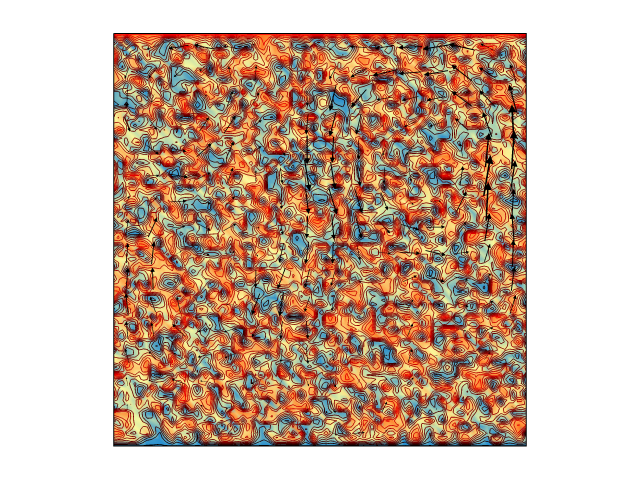

step:  10
time:  0.001220703125



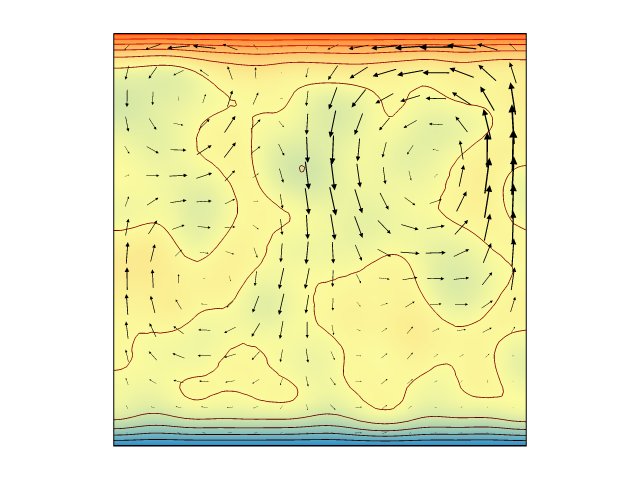

step:  20
time:  0.00244140625



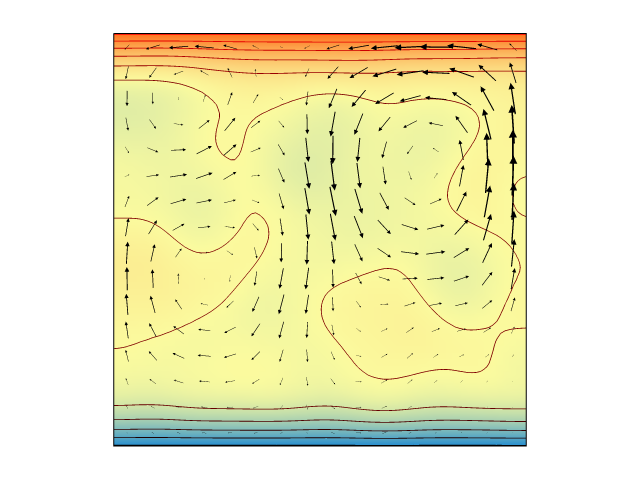

step:  30
time:  0.003662109375



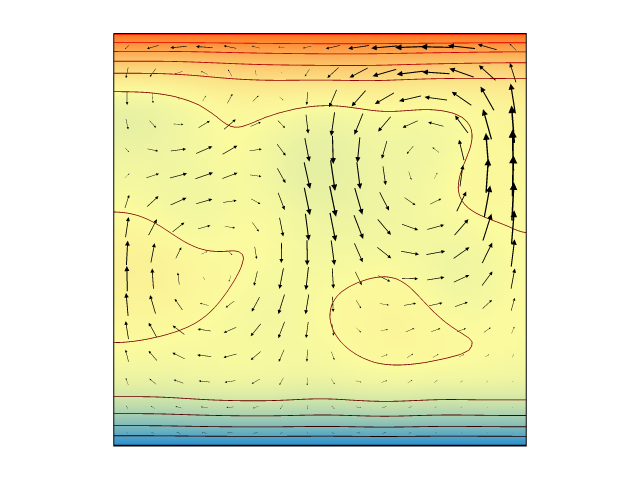

step:  40
time:  0.0048828125



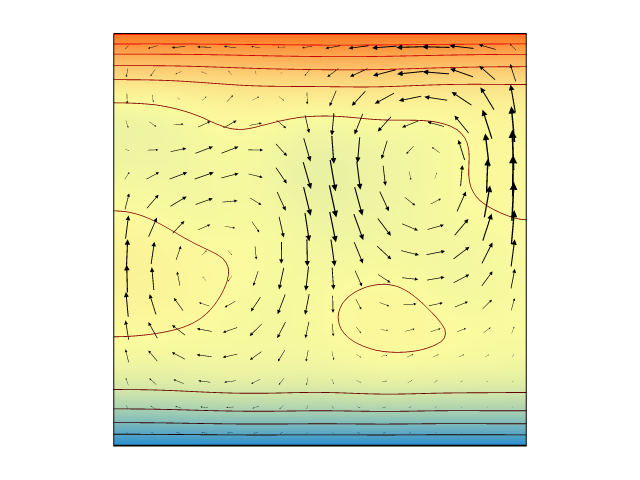

step:  50
time:  0.006103515625



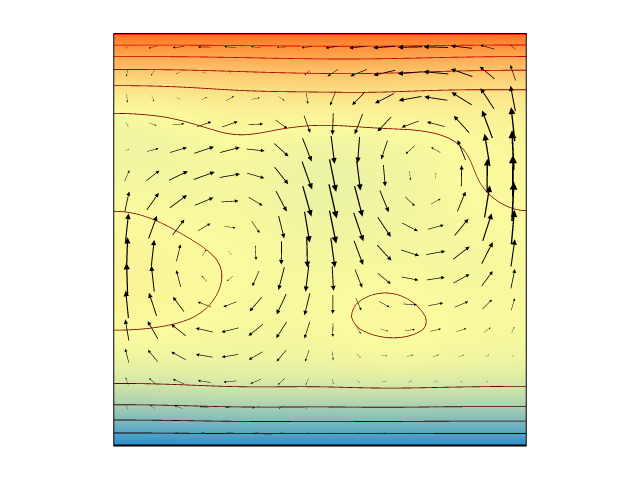

step:  60
time:  0.00732421875



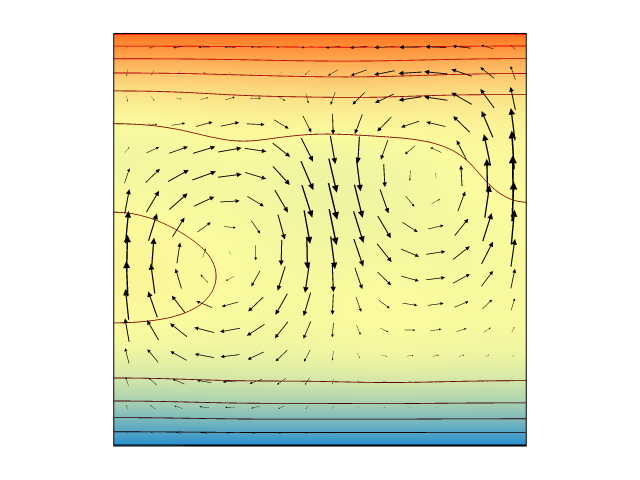

step:  70
time:  0.008544921875



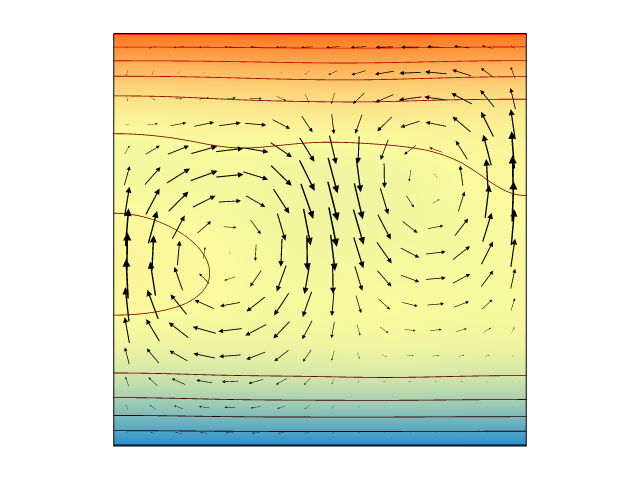

step:  80
time:  0.009765625



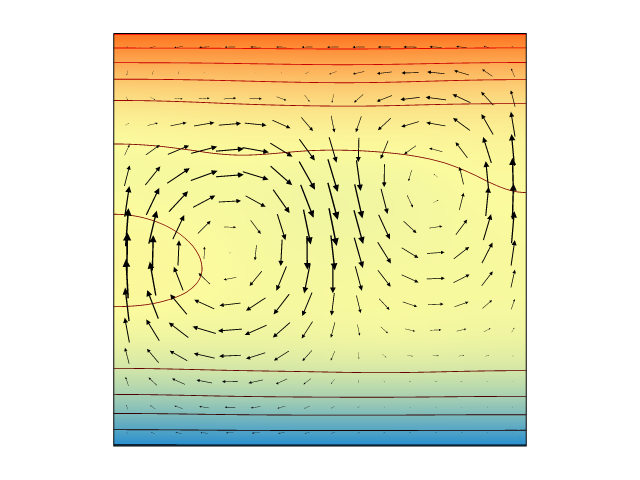

step:  90
time:  0.010986328125



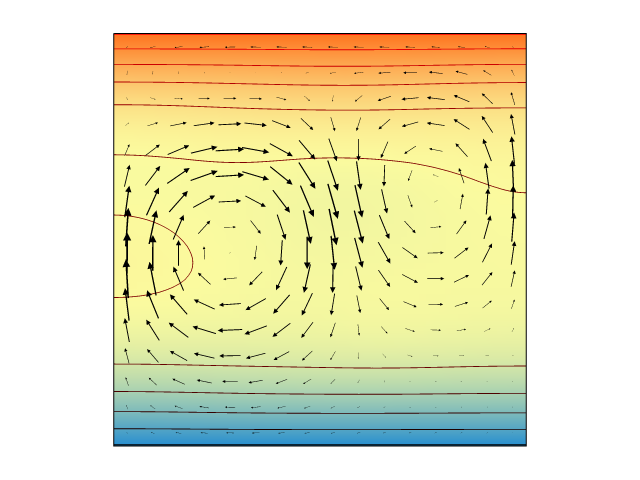

step:  100
time:  0.01220703125



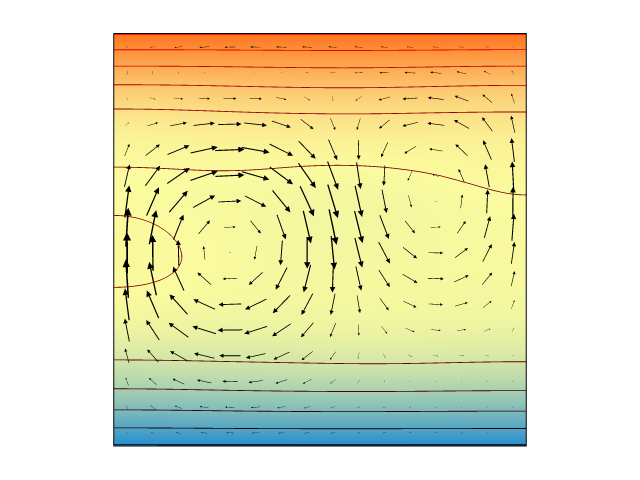

In [4]:
import numpy as np

import underworld as uw
fn = uw.function
import glucifer

# Define physical parameters:
Ra = 1e5
eta0 = 10.
res = 32

# Create the computational mesh:
mesh = uw.mesh.FeMesh_Cartesian(
    elementRes = (64, 64)
    )

# Create the system variables:
temperatureField = mesh.add_variable(1)
temperatureDotField = mesh.add_variable(1)
pressureField = uw.mesh.MeshVariable(mesh.subMesh, 1)
velocityField = mesh.add_variable(2)

# Define the walls:
outer = mesh.specialSets["MinJ_VertexSet"]
inner = mesh.specialSets["MaxJ_VertexSet"]
left = mesh.specialSets["MinI_VertexSet"]
right = mesh.specialSets["MaxI_VertexSet"]

# Define boundary conditions along the walls:
tempBC = uw.conditions.DirichletCondition(
    variable = temperatureField,
    indexSetsPerDof = (inner + outer)
    )
velBC = uw.conditions.DirichletCondition(
    variable = velocityField,
    indexSetsPerDof = (left + right, inner + outer)
    )

# Define the laws of physics:
buoyancyFn = Ra * temperatureField * (0., 1.)
viscosityFn = fn.math.pow(
    eta0,
    1. - temperatureField
    )
heatingFn = 1.
diffusivityFn = 1.

# Create the mathematical systems that solve them:
stokes = uw.systems.Stokes(
    velocityField = velocityField,
    pressureField = pressureField,
    conditions = [velBC,],
    fn_viscosity = viscosityFn,
    fn_bodyforce = buoyancyFn
    )

solver = uw.systems.Solver(stokes)

advDiff = uw.systems.AdvectionDiffusion(
    phiField = temperatureField,
    phiDotField = temperatureDotField,
    velocityField = velocityField,
    fn_diffusivity = diffusivityFn,
    conditions = [tempBC,]
    )

# Define the basic running constants:
step = fn.misc.constant(0)
modeltime = fn.misc.constant(0.)

# Make a function to initialise the model:
def initialise():
    step.value = 0
    modeltime.value = 0.
    randArray = np.random.rand(*temperatureField.data.shape)
    temperatureField.data[...] = randArray
    temperatureField.data[outer] = 0.
    temperatureField.data[inner] = 1.
    solver.solve()

# Create a figure so we can see what's happening:
fig = glucifer.Figure()
fig.append(
    glucifer.objects.Surface(
        mesh,
        temperatureField,
        colourBar = False
        )
    )
fig.append(
    glucifer.objects.VectorArrows(
        mesh,
        velocityField
        )
    )
fig.append(
    glucifer.objects.Contours(
        mesh,
        fn.math.log2(viscosityFn),
        colours = 'red black',
        colourBar = False
        )
    )

# Make a convenience function for the figure:
def show():
    if uw.mpi.rank == 0:
        print('step: ', step.value)
        print('time: ', modeltime.value)
    fig.show()

# Let's have a look at what we've got:
initialise()
show()

# Make a function that iterates the model:
def iterate():
    dt = advDiff.get_max_dt()
    advDiff.integrate(dt)
    solver.solve()
    step.value += 1
    modeltime.value += dt

# Make a convenience function for multiple iterations:
def go(n):
    for i in range(n):
        iterate()

# Let's go!

for i in range(10):
    go(10)
    show()

In [ ]:
uw.mpi.rank